In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import time
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
popular_100_df = pd.read_csv("Resources/Most popular 100 movies.csv", index_col=0)
popular_100_df.head()

,genre_ids,movie id,overview,popularity rank,title,year
0,"[878, 28, 53]",169,Ten years after a band of mercenaries first ba...,1,Predator 2,1990
1,"[14, 18, 10749]",162,A small suburban town receives a visit from a ...,2,Edward Scissorhands,1990
2,"[28, 53]",1573,John McClane is an off-duty cop gripped with a...,3,Die Hard 2,1990
3,"[10749, 35]",114,When a millionaire wheeler-dealer enters a bus...,4,Pretty Woman,1990
4,"[12, 10751]",71805,A young Norwegian boy in 1850s England goes to...,5,Shipwrecked,1990


In [24]:
movie_list=[]
year=[]
sentiment_compound=[]
for index, row in popular_100_df.iterrows():
    sentiment_results = analyzer.polarity_scores(row["overview"])
    sentiment_comp = sentiment_results["compound"]
    sentiment_compound.append(sentiment_comp)
    movie_list.append(row["movie id"])
    year.append(row["year"]) 


In [25]:
movie_list

[169,
 162,
 1573,
 114,
 71805,
 242,
 11186,
 581,
 1669,
 861,
 928,
 769,
 39323,
 1498,
 1700,
 1551,
 483,
 10847,
 5549,
 1375,
 39100,
 39101,
 530,
 10837,
 251,
 11856,
 10166,
 196,
 11005,
 18311,
 9569,
 1727,
 53932,
 4587,
 41003,
 2119,
 11909,
 11092,
 11595,
 11587,
 34636,
 17466,
 9586,
 37865,
 9558,
 9768,
 19185,
 9322,
 12516,
 21811,
 2469,
 11673,
 11131,
 2291,
 10173,
 14864,
 9362,
 11077,
 25018,
 10169,
 379,
 25831,
 12651,
 9399,
 21168,
 18943,
 10170,
 427910,
 1483,
 3072,
 2565,
 26612,
 9086,
 1662,
 25528,
 24016,
 28090,
 40346,
 31923,
 38718,
 9556,
 20815,
 41823,
 79509,
 154566,
 19086,
 11060,
 13995,
 9548,
 9491,
 17993,
 9356,
 28761,
 40729,
 20481,
 11630,
 10264,
 6723,
 3101,
 65497,
 10020,
 280,
 2907,
 10975,
 13888,
 10618,
 1541,
 11187,
 8367,
 9585,
 1089,
 16270,
 11284,
 10617,
 1633,
 24752,
 9595,
 9319,
 10380,
 9594,
 12227,
 13154,
 39102,
 17474,
 28597,
 15413,
 37137,
 35648,
 468,
 15804,
 892,
 2924,
 27769,
 11498

In [26]:
df_sentiment_analytics = pd.DataFrame({"movie id": movie_list,
                        "sentiment comp": sentiment_compound,
                        "Year": year})
df_sentiment_analytics.head()

,movie id,sentiment comp,Year
0,169,-0.9169,1990
1,162,0.0000,1990
2,1573,0.7096,1990
3,114,-0.1280,1990
4,71805,0.0000,1990


In [27]:
group_by_yearmonth = df_sentiment_analytics.groupby(df_sentiment_analytics["Year"])
df_grouped = pd.DataFrame(group_by_yearmonth["sentiment comp"].mean())
df_grouped = df_grouped.reset_index()
df_grouped

,Year,sentiment comp
0,1990,-0.209462
1,1991,-0.082481
2,1992,-0.172803
3,1993,-0.187018
4,1994,-0.042197
5,1995,-0.170106
6,1996,-0.068269
7,1997,-0.082529
8,1998,-0.106904
9,1999,-0.225021


In [ ]:
#x_min = datetime.datetime.strptime((df_sentimet_analytics["release date"].min()),"%Y-%m-%d") - datetime.timedelta(days=5)
#x_max = datetime.datetime.strptime((df_sentimet_analytics["release date"].max()),"%Y-%m-%d") + datetime.timedelta(days=5)
#x_max

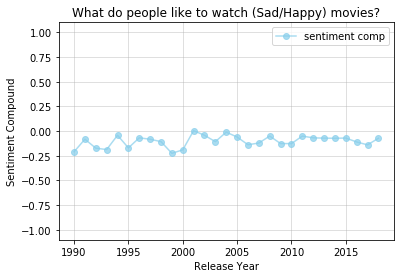

In [31]:
plt.plot(df_grouped["Year"], df_grouped["sentiment comp"], color="skyblue", alpha=0.7,marker="o")
plt.grid(True, alpha=0.5)
plt.title("What do people like to watch (Sad/Happy) movies?")
plt.xlabel("Release Year")
plt.ylabel("Sentiment Compound")
plt.ylim(-1.1,1.1)
plt.legend()
#plt.xlim("201709", "201809")